In [2]:
import pandas as pd
import dict_map as dm

df = pd.read_csv('Daten/trainingdata300.csv',escapechar="\\",sep=",",error_bad_lines=False,warn_bad_lines=False)
print(len(df))
# df = df.head(500000)
# print(len(df))
# df = df.groupby('satzId').filter(lambda x: len(x) <= 300)
# print(df)
token2idx, idx2token = dm.get_dict_map(df, 'token')
tag2idx, idx2tag = dm.get_dict_map(df, 'tag')

df['Word_idx'] = df['Wort'].map(token2idx)
df['Tag_idx'] = df['Attribut'].map(tag2idx)
print(df)

df_group = df.groupby(by = ['satzId'], as_index=False)['Wort', 'Attribut', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
#df_group
import pad_train_test as ptt
train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags = ptt.get_pad_train_test_val(df_group, df, tag2idx)

input_dim = len(list(set(df['Wort'].to_list())))+1
output_dim = 32
input_length = max([len(s) for s in df_group['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

4928484
         satzId           Wort       Attribut  Word_idx  Tag_idx
0             0          Broan        B-Brand     62610        3
1             0  TEN136WWBroan              O     61868        0
2             0       TEN136WW  B-Modelnumber     56200        2
3             0       Overview              O      5868        0
4             0            The              O     25693        0
...         ...            ...            ...       ...      ...
4928479   55339            AND              O     86905        0
4928480   55339    MAINTENANCE              O     86238        0
4928481   55339       Lockable              O     77342        0
4928482   55339        control              O     99813        0
4928483   55339          panel              O     69948        0

[4928484 rows x 5 columns]
<ipython-input-2-30e79f8f6de6>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group = df.groupby(

In [2]:
import model as md
model_bilstm_lstm = md.get_bilstm_lstm_model(input_dim, output_dim, input_length, n_tags)

#choco install graphviz, pip install pydot
#from tensorflow.keras.utils import plot_model 
#plot_model(model_bilstm_lstm)

import numpy as np
results = pd.DataFrame()
model, results['with_add_lstm'] = md.train_model(train_tokens, np.array(train_tags), model_bilstm_lstm)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 32)           415712    
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 64)           16640     
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 128)          98816     
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 6)            774       
Total params: 531,942
Trainable params: 531,942
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 77s 12s/step - loss: 1.7456 - accuracy: 0.8672 - val_loss: 1.6678 - val_accuracy: 0.9816
1.7455666065216064


In [5]:
from tensorflow.keras.models import Sequential, save_model, load_model
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Save the model
filepath = './models/saved_model'
# save_model(md, filepath)
model.save(filepath)

INFO:tensorflow:Assets written to: ./models/saved_model\assets


In [2]:
df_group.shape

(38919, 5)

In [17]:
dfs = df.head(10000)
size = dfs.satzId.value_counts() > 500
print(size)
dfs = dfs.groupby('satzId').filter(lambda x: len(x) < 500)
size = dfs.satzId.value_counts() >= 500
print(size)

23     True
12     True
28     True
9      True
1     False
7     False
13    False
11    False
16    False
10    False
19    False
30    False
4     False
24    False
31    False
14    False
8     False
29    False
18    False
2     False
6     False
22    False
3     False
26    False
5     False
25    False
0     False
21    False
15    False
20    False
27    False
17    False
Name: satzId, dtype: bool
1     False
7     False
13    False
11    False
16    False
10    False
19    False
30    False
4     False
24    False
31    False
14    False
8     False
29    False
18    False
2     False
6     False
22    False
3     False
26    False
5     False
25    False
0     False
21    False
15    False
20    False
27    False
17    False
Name: satzId, dtype: bool


<AxesSubplot:ylabel='Frequency'>

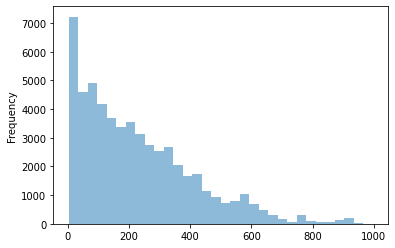

In [19]:
df.satzId.value_counts().plot.hist(bins=32, alpha=0.5)

In [ ]:
import model as md
#choco install graphviz, pip install pydot
model_bilstm_lstm = md.get_bilstm_lstm_model(input_dim, output_dim, input_length, n_tags)
from tensorflow.keras.utils import plot_model 
#plot_model(model_bilstm_lstm)

In [5]:
import numpy as np
results = pd.DataFrame()
results['with_add_lstm'] = md.train_model(train_tokens, np.array(train_tags), model_bilstm_lstm)

Epoch 1/10
43/43 [==============================] - 12s 146ms/step - loss: nan - accuracy: 0.0023 - val_loss: nan - val_accuracy: 0.0011
Epoch 2/10
43/43 [==============================] - 5s 120ms/step - loss: nan - accuracy: 0.0011 - val_loss: nan - val_accuracy: 0.0011
Epoch 3/10
43/43 [==============================] - 5s 120ms/step - loss: nan - accuracy: 0.0011 - val_loss: nan - val_accuracy: 0.0011
Epoch 4/10
43/43 [==============================] - 5s 120ms/step - loss: nan - accuracy: 0.0011 - val_loss: nan - val_accuracy: 0.0011
Epoch 5/10
43/43 [==============================] - 5s 106ms/step - loss: nan - accuracy: 0.0011 - val_loss: nan - val_accuracy: 0.0011
Epoch 6/10
43/43 [==============================] - 4s 105ms/step - loss: nan - accuracy: 0.0011 - val_loss: nan - val_accuracy: 0.0011
Epoch 7/10
43/43 [==============================] - 5s 112ms/step - loss: nan - accuracy: 0.0011 - val_loss: nan - val_accuracy: 0.0011
Epoch 8/10
43/43 [=============================

In [1]:
import tensorflow as tf 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

Num GPUs Available:  1


True

In [18]:
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]